## **Import Library**

In [ ]:
!pip install scikit-image

In [23]:
import matplotlib.pyplot as plt
import opendatasets as od
import seaborn as sns
import pandas as pd
import numpy as np
import os

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from skimage.transform import resize
from skimage.io import imread

## **Download Gambar Dataset**

In [ ]:
od.download("https://www.kaggle.com/kaustubhdikshit/neu-surface-defect-database")

## **Preprocessing Gambar**

In [14]:
def make_dataset(directory):
    target = []
    flat_data = []
    images = []

    DataDirectory = directory
    Categories = os.listdir(DataDirectory)

    for i in Categories:
      print("Kategori:", i, "\t\tLabel :", Categories.index(i))

      target_class = Categories.index(i)
      path = os.path.join(DataDirectory, i)

      for img in os.listdir(path):
        if img != '.ipynb_checkpoints':
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (200, 200))

            flat_data.append(img_resized.flatten())

            images.append(img_resized)
            target.append(target_class)


    flat_data = np.array(flat_data)

    images = np.array(images)
    target = np.array(target)
    
    df = pd.DataFrame(flat_data)
    df['Target'] = target
    
    return df

In [15]:
df_train = make_dataset("neu-surface-defect-database/NEU-DET/train/images")
df_train

Kategori: patches 		Label : 0
Kategori: inclusion 		Label : 1
Kategori: pitted_surface 		Label : 2
Kategori: crazing 		Label : 3
Kategori: rolled-in_scale 		Label : 4
Kategori: scratches 		Label : 5


,0,1,2,3,4,5,6,7,8,9,...,119991,119992,119993,119994,119995,119996,119997,119998,119999,Target
0,0.568627,0.568627,0.568627,0.560784,0.560784,0.560784,0.458824,0.458824,0.458824,0.443137,...,0.874510,0.874510,0.874510,0.807843,0.807843,0.807843,0.827451,0.827451,0.827451,0
1,0.964706,0.964706,0.964706,0.921569,0.921569,0.921569,1.000000,1.000000,1.000000,0.898039,...,0.658824,0.658824,0.658824,0.705882,0.705882,0.705882,0.674510,0.674510,0.674510,0
2,0.345098,0.345098,0.345098,0.262745,0.262745,0.262745,0.270588,0.270588,0.270588,0.364706,...,0.352941,0.352941,0.352941,0.380392,0.380392,0.380392,0.372549,0.372549,0.372549,0
3,0.564706,0.564706,0.564706,0.525490,0.525490,0.525490,0.541176,0.541176,0.541176,0.603922,...,0.611765,0.611765,0.611765,0.725490,0.725490,0.725490,0.886275,0.886275,0.886275,0
4,0.615686,0.615686,0.615686,0.650980,0.650980,0.650980,0.541176,0.541176,0.541176,0.639216,...,0.992157,0.992157,0.992157,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.290196,0.290196,0.290196,0.274510,0.274510,0.274510,0.286275,0.286275,0.286275,0.294118,...,0.258824,0.258824,0.258824,0.243137,0.243137,0.243137,0.231373,0.231373,0.231373,5
1436,0.592157,0.592157,0.592157,0.584314,0.584314,0.584314,0.576471,0.576471,0.576471,0.572549,...,0.482353,0.482353,0.482353,0.466667,0.466667,0.466667,0.482353,0.482353,0.482353,5
1437,0.486275,0.486275,0.486275,0.509804,0.509804,0.509804,0.501961,0.501961,0.501961,0.509804,...,0.321569,0.321569,0.321569,0.313725,0.313725,0.313725,0.305882,0.305882,0.305882,5
1438,0.490196,0.490196,0.490196,0.505882,0.505882,0.505882,0.490196,0.490196,0.490196,0.490196,...,0.317647,0.317647,0.317647,0.309804,0.309804,0.309804,0.317647,0.317647,0.317647,5


In [16]:
df_test = make_dataset("neu-surface-defect-database/NEU-DET/validation/images")
df_test

Kategori: patches 		Label : 0
Kategori: inclusion 		Label : 1
Kategori: pitted_surface 		Label : 2
Kategori: crazing 		Label : 3
Kategori: rolled-in_scale 		Label : 4
Kategori: scratches 		Label : 5


,0,1,2,3,4,5,6,7,8,9,...,119991,119992,119993,119994,119995,119996,119997,119998,119999,Target
0,0.168627,0.168627,0.168627,0.172549,0.172549,0.172549,0.200000,0.200000,0.200000,0.247059,...,0.556863,0.556863,0.556863,0.486275,0.486275,0.486275,0.486275,0.486275,0.486275,0
1,0.062745,0.062745,0.062745,0.066667,0.066667,0.066667,0.050980,0.050980,0.050980,0.047059,...,0.478431,0.478431,0.478431,0.490196,0.490196,0.490196,0.466667,0.466667,0.466667,0
2,0.450980,0.450980,0.450980,0.372549,0.372549,0.372549,0.337255,0.337255,0.337255,0.352941,...,0.850980,0.850980,0.850980,0.866667,0.866667,0.866667,0.800000,0.800000,0.800000,0
3,0.894118,0.894118,0.894118,0.980392,0.980392,0.980392,0.992157,0.992157,0.992157,0.988235,...,0.258824,0.258824,0.258824,0.231373,0.231373,0.231373,0.411765,0.411765,0.411765,0
4,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,1.000000,...,0.682353,0.682353,0.682353,0.658824,0.658824,0.658824,0.564706,0.564706,0.564706,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.290196,0.290196,0.290196,0.290196,0.290196,0.290196,0.298039,0.298039,0.298039,0.309804,...,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,5
356,0.313725,0.313725,0.313725,0.305882,0.305882,0.305882,0.309804,0.309804,0.309804,0.317647,...,0.231373,0.231373,0.231373,0.223529,0.223529,0.223529,0.211765,0.211765,0.211765,5
357,0.227451,0.227451,0.227451,0.223529,0.223529,0.223529,0.219608,0.219608,0.219608,0.223529,...,0.137255,0.137255,0.137255,0.137255,0.137255,0.137255,0.133333,0.133333,0.133333,5
358,0.290196,0.290196,0.290196,0.274510,0.274510,0.274510,0.270588,0.270588,0.270588,0.278431,...,0.180392,0.180392,0.180392,0.180392,0.180392,0.180392,0.180392,0.180392,0.180392,5


## **Train Test Split Dataset**

In [17]:
x_train = df_train.iloc[:,:-1].values
y_train = df_train['Target']

x_test = df_test.iloc[:,:-1].values
y_test = df_test['Target']

print("Dimensi training data       :", x_train.shape)
print("Dimensi output training data:", y_train.shape)

print("Dimensi input testing data  :", x_test.shape)
print("Dimensi output testing data :", y_test.shape)

Dimensi training data       : (1440, 120000)
Dimensi output training data: (1440,)
Dimensi input testing data  : (360, 120000)
Dimensi output testing data : (360,)


## **Training Model**

In [18]:
from sklearn.svm import SVC
                    
svc = SVC(C=100, gamma=0.001)
svc.fit(x_train, y_train)

SVC(C=100, gamma=0.001)

## **Evaluasi Model**

In [19]:
y_prediction = svc.predict(x_test)

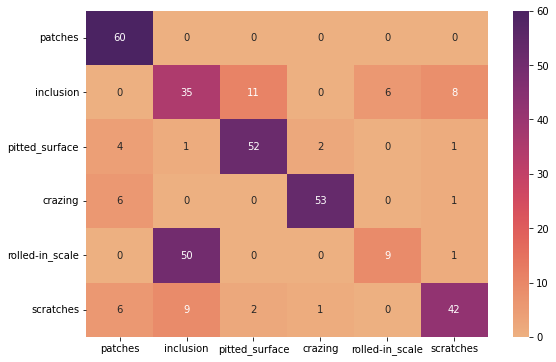


               precision    recall  f1-score   support

           0       1.00      0.79      0.88        76
           1       0.58      0.37      0.45        95
           2       0.87      0.80      0.83        65
           3       0.88      0.95      0.91        56
           4       0.15      0.60      0.24        15
           5       0.70      0.79      0.74        53

    accuracy                           0.70       360
   macro avg       0.70      0.72      0.68       360
weighted avg       0.77      0.70      0.72       360



In [20]:
conf_matrix = confusion_matrix(y_test, y_prediction)

plt.figure(figsize=(9, 6))

sns.heatmap(
    conf_matrix, 
    annot=True, 
    xticklabels=['patches', 'inclusion', 'pitted_surface', 'crazing', 'rolled-in_scale', 'scratches'], 
    yticklabels=['patches', 'inclusion', 'pitted_surface', 'crazing', 'rolled-in_scale', 'scratches'], 
    cmap='flare', fmt='d'
)

plt.show()

print("\n", classification_report(y_prediction, y_test))